In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

`numpy` để làm việc với mảng và phép toán số học.
`matplotlib` để vẽ biểu đồ và trực quan hóa dữ liệu.
`make_moons` từ sklearn.datasets để lấy dữ liệu mô phỏng moons dataset.
`train_test_split` từ sklearn.model_selection để chia dữ liệu thành tập huấn luyện và tập kiểm tra.
`svc` từ sklearn.svm để thực hiện phân loại từ mô hình Support Vector Machine.
`accuracy_score` từ sklearn.metrics để đánh giá độ chính xác của mô hình.

In [2]:
X, y = make_moons(n_samples=100, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

`make_moons` tạo ra một tập dữ liệu mô phỏng với hai lớp dữ liệu, mỗi lớp tương ứng với một nửa mặt trăng.
    `n_samples` tạo ra tập dữ liệu với 100 điểm mẫu.
    `noise` tạo ra nhiễu trong dữ liệu -> phức tạp hóa dữ liệu.
    `random_state` để dữ liệu được tạo ra có thể tái lập lại.
`X`matrix có kích thước 100x2, mỗi hàng là một điểm dữ liệu.
`y`mảng có kích thước 100, mỗi phần tử là label tương ứng của mỗi điểm dữ liệu.

`train_test_split` chia dữ liệu thành tập huấn luyện và tập kiểm tra.
    `test_size` tỷ lệ dữ liệu kiểm tra.
    `random_state` để chia dữ liệu nhất quán giữa các lần chạy.
`X_train` dữ liệu huấn luyện.
`X_test` dữ liệu kiểm tra.
`y_train` nhãn huấn luyện.
`y_test` nhãn kiểm tra.

In [3]:
model = SVC(kernel='rbf', gamma='auto')
model.fit(X_train, y_train)

SVC(gamma='auto')

SVC: sử dụng mô hình huấn luyện của SVM & kernel RBF để giải bài toán phân loại phi tuyến bằng cách ánh xạ dữ liệu vào không gian.
syntax: SVC(C, kernel, degree, gamma, coef0, shrinking, probability, tol, cache_size, class_weight, verbose, max_iter, decision_function_shape, break_ties, random_state)
    `C` tham số điều chỉnh độ chính xác của mô hình.
    `kernel` hàm kernel sử dụng để ánh xạ dữ liệu.
    `degree` bậc của hàm đa thức.
    `gamma` hệ số ảnh hưởng của một điểm dữ liệu.
    `coef0` hệ số tự do trong hàm đa thức và hàm sigmoid.
    `shrinking` giảm kích thước của tập huấn luyện.
    `probability` xác suất dự đoán.
    `tol` ngưỡng dừng.
    `cache_size` kích thước bộ nhớ đệm.
    `class_weight` trọng số của các lớp.
    `verbose` hiển thị thông tin.
    `max_iter` số lượng vòng lặp tối đa.
    `decision_function_shape` hình dạng của hàm quyết định.
    `break_ties` phân loại nhãn khi có sự xung đột.
    `random_state` để mô hình có thể tái lập lại.

sử dụng mô hình SVC với kernel RBF để phân loại dữ liệu.
    `kernel` = `rbf` sử dụng hàm kernel RBF.
    `C` = 1.0 tham số điều chỉnh độ phức tạp của mô hình. Giá trị lớn hơn làm cho mô hình phân loại chính xác tất cả các điểm dữ liệu trong tập huấn luyện nhưng có thể dẫn đến overfitting.
    `gamma` = `auto`

`model.fit` để huấn luyện mô hình trên tập train. sử dụng dữ liệu huấn luyện để học cách phân loại dữ liệu và nhãn từ tập huấn luyện.

In [4]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9666666666666667


`model.predict` sử dụng mô hình đã huấn luyện để dự đoán nhãn của các mẫu trong tập kiểm tra.
`accuracy_score` để đánh giá độ chính xác của mô hình bằng cách so sánh nhãn dự đoán với nhãn thực tế của tập kiểm tra (y_pred & y_test).

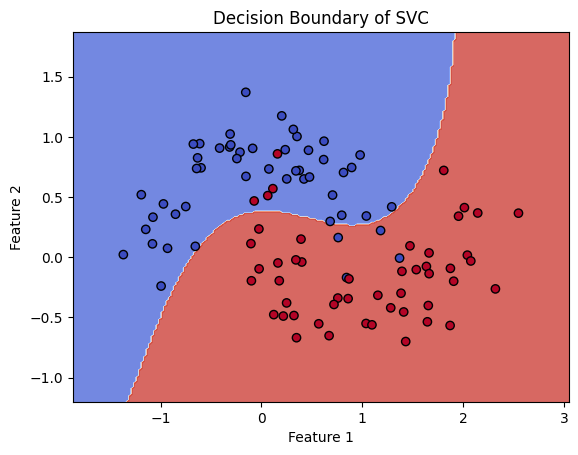

In [5]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary of SVC')
    plt.show()
    
plot_decision_boundary(model, X, y)

`plot_decision_boundary` tạo vùng bao phân lớp của mô hình dữ liệu.
    # thiết lập grid.
    `x_min`, `x_max` giới hạn dữ liệu theo trục x.
    `y_min`, `y_max` giới hạn dữ liệu theo trục y.
    `.meshgrid` tạo ra một lưới 2D từ các giá trị x và y.
    `np.c_` kết hợp các giá trị xx và yy thành một mảng 2D -> dự đoán.
    # dự đoán nhãn của các điểm dữ liệu trên lưới.
    `predict` dự đoán nhãn của các điểm dữ liệu trên lưới.
    `reshape` định hình lại mảng kết quả `z` phù hợp với lưới `xx`.
    # vẽ đường boundary.
    `contourf` vẽ đường biên phân lớp của mô hình dữ liệu.
        `alpha` độ trong suốt của vùng bao phân lớp.
        `cmap` màu sắc của vùng bao phân lớp.
    `scatter` vẽ điểm dữ liệu từ tập `x` và `y` và màu tương ứng với nhãn.
        `c` màu của điểm dữ liệu.
        `edgecolors` màu viền của điểm dữ liệu.
        `marker` kí hiệu của điểm dữ liệu.
        `s` kích thước của điểm dữ liệu.
        `cmap` màu sắc của điểm dữ liệu.
    `xlabel`, `ylabel` tên trục x và y. 
    `title` tiêu đề của biểu đồ.
    `show` hiển thị biểu đồ.